<If there are any questions, reach out via winston.vargo@mongodb.com>

[Find Me on LinkedIn!](https://www.linkedin.com/in/winston-vargo/)

# Welcome to Session 3: Indexes and Aggregations
## Aggregations

In our last session we talked in depth about `MQL`, Mongo Query Language, which is the primary way to perform reads, writes, updates, etc, against data in MongoDB. However, there is sometimes a requirement to read data (or manipulate data) in more advanced ways than `MQL`

To accomplish this, MongoDB has another query syntax called the `Aggregation Framework`. It generally follows the following syntax:

`db.collection.aggregate([aggregation_stages])`

As an argument, the `aggregate` accepts an array of `stages`. The output of 1 stage becomes the input to the next stage, so a developer is able to massage the data in unique ways.

One limitation of the aggregation stage is no stage can have more than 100mb of data (allowDiskUse to get around this)

**similar to how knowing / remembering query operators, it is important on the test to have a level of knowledge regarding the most common stages**

Let's take a look at some basic aggregations, then we can do a deeper dive into the specific stages

In [42]:
# First Let's connect to the DB
# Variables
mongoDB_username = ""
mongoDB_password = ""
mongoDB_connection_string = ""

In [47]:
aggString = "db.movies.aggregate([{\$match:{year:1991}}])"

print(aggString.replace("\\", ""))
print("")

!mongosh {mongoDB_connection_string} --quiet  --username {mongoDB_username} -p {mongoDB_password} \
--eval "use sample_mflix" \
--eval """{aggString}"""

db.movies.aggregate([{$match:{year:1991}}])

]0;mongosh mongodb+srv://<credentials>@devcert.6ngvd.mongodb.net/ [
  {
    _id: ObjectId("573a139af29313caabcf0fef"),
    genres: [ 'Documentary', 'Short' ],
    runtime: 12,
    title: 'A Year Along the Abandoned Road',
    countries: [ 'Norway' ],
    lastupdated: '2015-08-29 07:41:28.120000000',
    num_mflix_comments: 0,
    released: ISODate("1991-09-29T00:00:00.000Z"),
    directors: [ 'Morten Skallerud' ],
    awards: { wins: 3, nominations: 0, text: '3 wins.' },
    year: 1991,
    imdb: { rating: 7.5, votes: 188, id: 103301 },
    type: 'movie'
  },
  {
    _id: ObjectId("573a1399f29313caabcec8a1"),
    plot: 'A plain, ordinary man tells us about his work as a real-estate broker, his dead father, his ordinary home and so on in a naturalistic voice, lacking any emotions, looking straight into the ...',
    genres: [ 'Short', 'Comedy' ],
    runtime: 14,
    title: 'World of Glory',
    countries: [ 'Sweden' ],
    fullplot: 'A pla

In [5]:
aggString = "db.movies.aggregate([{\$match:{year:1991}},{\$skip:3}])"

print(aggString.replace("\\", ""))
print("")

!mongosh {mongoDB_connection_string} --quiet  --username {mongoDB_username} -p {mongoDB_password} \
--eval "use sample_mflix" \
--eval """{aggString}"""

db.movies.aggregate([{$match:{year:1991}},{$skip:3}])

]0;mongosh mongodb+srv://<credentials>@devcert.6ngvd.mongodb.net/ [
  {
    _id: ObjectId("573a1398f29313caabcebdf2"),
    plot: 'Over more than thirty years, a department of the Condesa in Mexico City, is the setting in which they are carried out ten stories, mixed, form one whose only constant is the rupture. The ...',
    genres: [ 'Drama' ],
    runtime: 87,
    cast: [
      'Gabriela Roel',
      'Arcelia Ramèrez',
      'Verènica Merchant',
      'Roberto Sosa'
    ],
    num_mflix_comments: 0,
    title: 'City of the Blind',
    fullplot: 'Over more than thirty years, a department of the Condesa in Mexico City, is the setting in which they are carried out ten stories, mixed, form one whose only constant is the rupture. The passage of time and the outside world only guess through the windows and objects that come with the characters. The set is a great solitude, possible in a city of the blind.',
    languages: [ 'Spanish'

## Aggregation Stages

As previously mentioned, the aggregation framework accepts as an arugment an array of `stages`. There are many types of stages, which all have their own associated use and syntax. Memorizing / knowing some of the most common stages is very important to being a certified MongoDB developer.

- `$match`: Basically the same as a standard MQL query
- `$project`: Similar to a standard MQL projection
- `$limit`: limiting the results of a stage
- `$out`: Persisting the results of an aggregation to another collection
- `$lookup`: Similar to a SQL Join, incorporating data from another collection in the aggregation
- `$set`: for modifying documents within an aggregation query
- `$unwind`: to manipulate array values
- `$group`: to group and create averages, summaries, etc
- `$search`: To use a MongoDB Atlas Search index to perform a lucene based search. More on this later.

A few other notes:

- the aggregation framework allows a developer to access data within a document by using `$` syntax
- there are a lot of stages. Although the above list covers most of them, I encourage you to [check them all out here](https://www.mongodb.com/docs/manual/reference/operator/aggregation-pipeline/)

Let's take a look now at some aggregations in action:

In [9]:
aggString = "db.movies.aggregate([{\$match:{year:1991}},{\$set:{'plot':1,'firstCast':{\$first:'\$cast'}}},{\$limit:1}])"

print(aggString.replace("\\", ""))
print("")

!mongosh {mongoDB_connection_string} --quiet  --username {mongoDB_username} -p {mongoDB_password} \
--eval "use sample_mflix" \
--eval """{aggString}"""

db.movies.aggregate([{$match:{year:1991}},{$set:{'plot':1,'firstCast':{$first:'$cast'}}},{$limit:1}])

]0;mongosh mongodb+srv://<credentials>@devcert.6ngvd.mongodb.net/ [
  {
    _id: ObjectId("573a1398f29313caabcead6a"),
    plot: 1,
    genres: [ 'Drama', 'Romance' ],
    runtime: 110,
    cast: [
      'Ingrid Thulin',
      'Dado Ruspoli',
      'Enzo Cannavale',
      'Nuccia Fumo'
    ],
    title: 'The House of Smiles',
    fullplot: 'Adelina, a former "Miss Smiles" beauty queen, is a resident at a senior citizen retirement home. Her joie de vie and unfaded beauty make her attractive to the male residents, especially Andrea, a dapper and charming but married septuagenarian. Their initial mutual attraction evolves into physical desire, but their families and the conservative culture of the institution conspire against their consummating their love.',
    languages: [ 'Italian', 'French' ],
    released: ISODate("1991-03-01T00:00:00.000Z"),
    directors: [ 'Marco Ferreri' ],
  

Let's talk about this aggregration:

First, we performed a `$match` on movies where `{year:1991}`. Keep in mind this can be any filter, such as `$gte` or `$in`

Then, the results of the previous stage (movies that are from 1991) _enters_ the `$set` stage. 

In this stage, we assign the value of 1 to the `plot` field. So in this case, it acts as an update

In the same `$set` stage, we create a new k:v pair called `firstCast` amd the value of that field is the first element of the `cast` array. Note how we use the `$` syntax to tell the query that we are referring to the `cast` field, not a string "cast"

we then limit the result to 1 to make it easier to read. 

Note that each stage has its own associated syntax. For example, the `$match` stage accepts a filter, where the `$limit` stage accepts an integer

Let's extend the same aggregation with a `$out`

In [10]:
aggString = "db.movies.aggregate([{\$match:{year:1991}},{\$set:{'plot':1,'firstCast':{\$first:'\$cast'}}},{\$limit:1},{\$out:'outTest'}])"

print(aggString.replace("\\", ""))
print("")

!mongosh {mongoDB_connection_string} --quiet  --username {mongoDB_username} -p {mongoDB_password} \
--eval "use sample_mflix" \
--eval """{aggString}"""

db.movies.aggregate([{$match:{year:1991}},{$set:{'plot':1,'firstCast':{$first:'$cast'}}},{$limit:1},{$out:'outTest'}])

]0;mongosh mongodb+srv://<credentials>@devcert.6ngvd.mongodb.net/ 


In [12]:
readString = "db.outTest.find()"

print(readString.replace("\\", ""))
print("")

!mongosh {mongoDB_connection_string} --quiet  --username {mongoDB_username} -p {mongoDB_password} \
--eval "use sample_mflix" \
--eval """{readString}"""

db.outTest.find()

]0;mongosh mongodb+srv://<credentials>@devcert.6ngvd.mongodb.net/ [
  {
    _id: ObjectId("573a1398f29313caabcead6a"),
    plot: 1,
    genres: [ 'Drama', 'Romance' ],
    runtime: 110,
    cast: [
      'Ingrid Thulin',
      'Dado Ruspoli',
      'Enzo Cannavale',
      'Nuccia Fumo'
    ],
    title: 'The House of Smiles',
    fullplot: 'Adelina, a former "Miss Smiles" beauty queen, is a resident at a senior citizen retirement home. Her joie de vie and unfaded beauty make her attractive to the male residents, especially Andrea, a dapper and charming but married septuagenarian. Their initial mutual attraction evolves into physical desire, but their families and the conservative culture of the institution conspire against their consummating their love.',
    languages: [ 'Italian', 'French' ],
    released: ISODate("1991-03-01T00:00:00.000Z"),
    directors: [ 'Marco Ferreri' ],
    writers: [ 'Liliane Betti', 'Marco Ferreri', 'Antonino Marino' ],
    awards: { wi

Note that the result of `$out` is not a set of documents. If you were to run this from the shell, the output would be a result object specifying if the aggregation was successful. `$out` completely rewrites the target collection. For an append workload, the alternative `$merge` stage must be used.

**unwinding and grouping**

Consider the following aggregations:

In [19]:
aggString = "db.movies.aggregate([{\$limit:10},{\$project:{title:1,genres:1,runtime:1}}])"

print(aggString.replace("\\", ""))
print("")

!mongosh {mongoDB_connection_string} --quiet  --username {mongoDB_username} -p {mongoDB_password} \
--eval "use sample_mflix" \
--eval """{aggString}"""

db.movies.aggregate([{$limit:10},{$project:{title:1,genres:1}}])

]0;mongosh mongodb+srv://<credentials>@devcert.6ngvd.mongodb.net/ [
  {
    _id: ObjectId("573a1390f29313caabcd4803"),
    genres: [ 'Animation', 'Short', 'Comedy' ],
    title: 'Winsor McCay, the Famous Cartoonist of the N.Y. Herald and His Moving Comics'
  },
  {
    _id: ObjectId("573a1390f29313caabcd516c"),
    genres: [ 'Drama', 'History' ],
    title: 'In the Land of the Head Hunters'
  },
  {
    _id: ObjectId("573a1390f29313caabcd5293"),
    genres: [ 'Action' ],
    title: 'The Perils of Pauline'
  },
  {
    _id: ObjectId("573a1390f29313caabcd63d6"),
    genres: [ 'Fantasy' ],
    title: 'The Blue Bird'
  },
  {
    _id: ObjectId("573a1391f29313caabcd6f98"),
    genres: [ 'Crime', 'Drama', 'Mystery' ],
    title: 'The Ace of Hearts'
  },
  {
    _id: ObjectId("573a1391f29313caabcd70b4"),
    genres: [ 'Drama', 'Romance', 'War' ],
    title: 'The Four Horsemen of the Apocalypse'
  },
  {
    _id: ObjectId("573

In [20]:
aggString = "db.movies.aggregate([{\$limit:10},{\$project:{title:1,genres:1,runtime:1}},{\$unwind:{path:'\$genres'}}])"

print(aggString.replace("\\", ""))
print("")

!mongosh {mongoDB_connection_string} --quiet  --username {mongoDB_username} -p {mongoDB_password} \
--eval "use sample_mflix" \
--eval """{aggString}"""

db.movies.aggregate([{$limit:10},{$project:{title:1,genres:1}},{$unwind:{path:'$genres'}}])

]0;mongosh mongodb+srv://<credentials>@devcert.6ngvd.mongodb.net/ [
  {
    _id: ObjectId("573a1390f29313caabcd4803"),
    genres: 'Animation',
    title: 'Winsor McCay, the Famous Cartoonist of the N.Y. Herald and His Moving Comics'
  },
  {
    _id: ObjectId("573a1390f29313caabcd4803"),
    genres: 'Short',
    title: 'Winsor McCay, the Famous Cartoonist of the N.Y. Herald and His Moving Comics'
  },
  {
    _id: ObjectId("573a1390f29313caabcd4803"),
    genres: 'Comedy',
    title: 'Winsor McCay, the Famous Cartoonist of the N.Y. Herald and His Moving Comics'
  },
  {
    _id: ObjectId("573a1390f29313caabcd516c"),
    genres: 'Drama',
    title: 'In the Land of the Head Hunters'
  },
  {
    _id: ObjectId("573a1390f29313caabcd516c"),
    genres: 'History',
    title: 'In the Land of the Head Hunters'
  },
  {
    _id: ObjectId("573a1390f29313caabcd5293"),
    genres: 'Action',
    title: '

In [22]:
aggString = "db.movies.aggregate([{\$limit:10},{\$project:{title:1,genres:1,runtime:1}},{\$unwind:{path:'\$genres'}},{\$group:{_id:'\$genres',listOfMovies:{\$push:'\$title'},avgRuntime:{\$avg:'\$runtime'}}}])"

print(aggString.replace("\\", ""))
print("")

!mongosh {mongoDB_connection_string} --quiet  --username {mongoDB_username} -p {mongoDB_password} \
--eval "use sample_mflix" \
--eval """{aggString}"""

db.movies.aggregate([{$limit:10},{$project:{title:1,genres:1,runtime:1}},{$unwind:{path:'$genres'}},{$group:{_id:'$genres',listOfMovies:{$push:'$title'},avgRuntime:{$avg:'$runtime'}}}])

]0;mongosh mongodb+srv://<credentials>@devcert.6ngvd.mongodb.net/ [
  {
    _id: 'Fantasy',
    listOfMovies: [ 'The Blue Bird', 'The Thief of Bagdad' ],
    avgRuntime: 115
  },
  {
    _id: 'Animation',
    listOfMovies: [
      'Winsor McCay, the Famous Cartoonist of the N.Y. Herald and His Moving Comics'
    ],
    avgRuntime: 7
  },
  {
    _id: 'Western',
    listOfMovies: [ 'The Iron Horse' ],
    avgRuntime: 150
  },
  {
    _id: 'Action',
    listOfMovies: [ 'The Perils of Pauline' ],
    avgRuntime: 199
  },
  {
    _id: 'Crime',
    listOfMovies: [ 'The Ace of Hearts' ],
    avgRuntime: 75
  },
  {
    _id: 'Family',
    listOfMovies: [ 'The Thief of Bagdad' ],
    avgRuntime: 155
  },
  {
    _id: 'History',
    listOfMovies: [ 'In the Land of the Head Hunters' ],
    avgRuntime: 65
  },


The previous 3 aggregations were built on each other to show various stages:

in the first aggregation, we use `$limit` and `$project`

in the second agg, we use `$unwind` to break apart the `genres` array. Notice how the result set has multiple entries per movie. Note the fact that unwind accepts as an argument an object that looks like `{path:'$genres'}`. That is part of the `$unwind` syntax (there are more arguments for `$unwind` but they are out of the scope of this session)

In the third agg, we use those unwound movie-genre records, and then `$group` by the genre. This stage accepts an `_id` field (which is the field we group on) and all the other fields accept an `accumulator` such as `$push` or `$avg`.

Note that the same command can mean different things in different contexts. Take for example `$push`. If this is part of an update statement (look back at session 2 for examples of this), it signifies to the server to insert an element into an array. When it is used in the context of an accumulator, it signifies to the server to make arrays based on grouped keys.

Here's one more aggregation:

In [27]:
aggString = "db.movies.aggregate([{\$match:{title:'The Black Pirate'}},{\$lookup:{from:'comments',localField:'_id',foreignField:'movie_id',as:'comments'}}])"

print(aggString.replace("\\", ""))
print("")

!mongosh {mongoDB_connection_string} --quiet  --username {mongoDB_username} -p {mongoDB_password} \
--eval "use sample_mflix" \
--eval """{aggString}"""

db.movies.aggregate([{$match:{title:'The Black Pirate'}},{$lookup:{from:'comments',localField:'_id',foreignField:'movie_id',as:'comments'}}])

]0;mongosh mongodb+srv://<credentials>@devcert.6ngvd.mongodb.net/ [
  {
    _id: ObjectId("573a1391f29313caabcd8268"),
    plot: "Seeking revenge, an athletic young man joins the pirate band responsible for his father's death.",
    genres: [ 'Adventure', 'Action' ],
    runtime: 88,
    cast: [ 'Billie Dove', 'Tempe Pigott', 'Donald Crisp', 'Sam De Grasse' ],
    num_mflix_comments: 1,
    poster: 'https://m.media-amazon.com/images/M/MV5BMzU0NDkyMjEzMV5BMl5BanBnXkFtZTgwMTcyMzEyMjE@._V1_SY1000_SX677_AL_.jpg',
    title: 'The Black Pirate',
    fullplot: 'A nobleman vows to avenge the death of his father at the hands of pirates. To this end he infiltrates the pirate band. Acting in character he is instrumental in the capture of a ship, but things are complicated when he finds that there is a young woman on board whom he wishes to protect from t

The previous aggregation showed an example of a `$lookup`, which is like a SQL Join against another table (collection). In the example, we are joining `movies` with `comments` based on the movie's `_id` value

## Indexes

... Okay... 

So we're done talking about querying for a while.

**IT IS INCREDIBLY IMPORTANT THAT YOU MEMORIZE THE CONTENT FROM THIS SESSION AND THE PAST SESSION. WHILE INDEXES ARE IMPORTANT FOR A MONGODB DEVELOPER, KNOWLEDGE OF MQL AND AGGREGATIONS MAKE UP 50% OF THE TEST'S CONTENT.**

For any real use of MongoDB, it is required to make an index to support the most common queries. Before talking about MongoDB indexes, I will spend a bit discussing how the MongoDB server process _works_

- CPU: Coordinates query parsing and query handling
- RAM: contains indexes and data that is being "examined", as well as handling connections, managing transactions, cursors
- SSD / "storage" / "disk": stores all data files

Every time the server receives a query of a new "shape' (the inputs in the query), a background server process will determine the best index to use and store the "query plan" in memory.

Documents need to be examined - the process of checking fields to see if they match the filter that is passed into the query. MongoDB does not have the ability to "examine" documents while they are in disk. Thus, all documents that _may_ satisfy the query will be "fetched" from disk into memory. An index allows the database to store fields in memory, and by using indexes we can avoid fetching many documents from disk to RAM.

I should point out that fetching large amounts of documents from disk to RAM is a very slow operation that highly taxes available computer resources. It is beyond the scope of these sessions, but generally we should avoid large "scans"

... Okay...

That's enough of the theoretical stuff for now.

Here are some facts:
- Indexes are defined at the collection level
- Indexes can be created on individual fields, or multiple fields
- For multiple field ("compound") indexes, the ordering matters
- The _id field is always indexed
- Indexes can be used to enforce uniqueness
- administrative commands for creating indexes and removing indexes are not a focus for the developer exam.

The best way to reason about indexes is to reason about them like a phone book. We will talk about this soon.

Let's look at some basic commands regarding indexes:

In [51]:
idxString = "db.movies.getIndexes()"

print(idxString.replace("\\", ""))
print("")

!mongosh {mongoDB_connection_string} --quiet  --username {mongoDB_username} -p {mongoDB_password} \
--eval "use sample_mflix" \
--eval """{idxString}"""

db.movies.getIndexes()

]0;mongosh mongodb+srv://<credentials>@devcert.6ngvd.mongodb.net/ [
  { v: 2, key: { _id: 1 }, name: '_id_' },
  {
    v: 2,
    key: { _fts: 'text', _ftsx: 1 },
    name: 'cast_text_fullplot_text_genres_text_title_text',
    weights: { cast: 1, fullplot: 1, genres: 1, title: 1 },
    default_language: 'english',
    language_override: 'language',
    textIndexVersion: 3
  },
  { v: 2, key: { title: 1 }, name: 'title_1' },
  { v: 2, key: { cast: 1 }, name: 'cast_1' },
  { v: 2, key: { imdb: 1 }, name: 'imdb_1' },
  {
    v: 2,
    key: { title: 1, year: 1, runtime: 1 },
    name: 'title_1_year_1_runtime_1',
    sparse: false
  },
  {
    v: 2,
    key: { year: 1, runtime: 1, released: 1 },
    name: 'year_1_runtime_1_released_1',
    sparse: false
  }
]


In [30]:
createString = "db.movies.createIndex({title:1})"
idxString = "db.movies.find({title:'Peter Pan'}).explain('executionStats')"

print(idxString.replace("\\", ""))
print("")

!mongosh {mongoDB_connection_string} --quiet  --username {mongoDB_username} -p {mongoDB_password} \
--eval "use sample_mflix" \
--eval """{createString}""" \
--eval """{idxString}"""

db.movies.find({title:'Groundhog Day'}).explain('executionStats')

]0;mongosh mongodb+srv://<credentials>@devcert.6ngvd.mongodb.net/ {
  explainVersion: '1',
  queryPlanner: {
    namespace: 'sample_mflix.movies',
    indexFilterSet: false,
    parsedQuery: { title: { '$eq': 'Groundhog Day' } },
    queryHash: '244E9C29',
    planCacheKey: 'D716F3F7',
    maxIndexedOrSolutionsReached: false,
    maxIndexedAndSolutionsReached: false,
    maxScansToExplodeReached: false,
    winningPlan: {
      stage: 'FETCH',
      inputStage: {
        stage: 'IXSCAN',
        keyPattern: { title: 1 },
        indexName: 'title_1',
        isMultiKey: false,
        multiKeyPaths: { title: [] },
        isUnique: false,
        isSparse: false,
        isPartial: false,
        indexVersion: 2,
        direction: 'forward',
        indexBounds: { title: [ '["Groundhog Day", "Groundhog Day"]' ] }
      }
    },
    rejectedPlans: []
  },
  executionStats: {
    executionSuccess: true,
    nReturned: 

In [31]:
createString = "db.movies.createIndex({title:1})"
idxString = "db.movies.find({title:'Peter Pan',year:1924}).explain('executionStats')"

print(idxString.replace("\\", ""))
print("")

!mongosh {mongoDB_connection_string} --quiet  --username {mongoDB_username} -p {mongoDB_password} \
--eval "use sample_mflix" \
--eval """{createString}""" \
--eval """{idxString}"""

db.movies.find({title:'Peter Pan',year:1924}).explain('executionStats')

]0;mongosh mongodb+srv://<credentials>@devcert.6ngvd.mongodb.net/ {
  explainVersion: '1',
  queryPlanner: {
    namespace: 'sample_mflix.movies',
    indexFilterSet: false,
    parsedQuery: {
      '$and': [ { title: { '$eq': 'Peter Pan' } }, { year: { '$eq': 1924 } } ]
    },
    queryHash: '81794345',
    planCacheKey: 'CBFFE61D',
    maxIndexedOrSolutionsReached: false,
    maxIndexedAndSolutionsReached: false,
    maxScansToExplodeReached: false,
    winningPlan: {
      stage: 'FETCH',
      filter: { year: { '$eq': 1924 } },
      inputStage: {
        stage: 'IXSCAN',
        keyPattern: { title: 1 },
        indexName: 'title_1',
        isMultiKey: false,
        multiKeyPaths: { title: [] },
        isUnique: false,
        isSparse: false,
        isPartial: false,
        indexVersion: 2,
        direction: 'forward',
        indexBounds: { title: [ '["Peter Pan", "Peter Pan"]' ] }
      }
    },
  

In [32]:
createString = "db.movies.createIndex({title:1})"
idxString = "db.movies.find({runtime:111}).explain('executionStats')"

print(idxString.replace("\\", ""))
print("")

!mongosh {mongoDB_connection_string} --quiet  --username {mongoDB_username} -p {mongoDB_password} \
--eval "use sample_mflix" \
--eval """{createString}""" \
--eval """{idxString}"""

db.movies.find({runtime:111}).explain('executionStats')

]0;mongosh mongodb+srv://<credentials>@devcert.6ngvd.mongodb.net/ {
  explainVersion: '1',
  queryPlanner: {
    namespace: 'sample_mflix.movies',
    indexFilterSet: false,
    parsedQuery: { runtime: { '$eq': 111 } },
    queryHash: '8778F046',
    planCacheKey: '8778F046',
    maxIndexedOrSolutionsReached: false,
    maxIndexedAndSolutionsReached: false,
    maxScansToExplodeReached: false,
    winningPlan: {
      stage: 'COLLSCAN',
      filter: { runtime: { '$eq': 111 } },
      direction: 'forward'
    },
    rejectedPlans: []
  },
  executionStats: {
    executionSuccess: true,
    nReturned: 251,
    executionTimeMillis: 20,
    totalKeysExamined: 0,
    totalDocsExamined: 21349,
    executionStages: {
      stage: 'COLLSCAN',
      filter: { runtime: { '$eq': 111 } },
      nReturned: 251,
      executionTimeMillisEstimate: 2,
      works: 21350,
      advanced: 251,
      needTime: 21098,
      needYield: 0,
      sa

The first example is using `db.collection.getIndexes()` to print out the list of indexes for that collection.

The next three examples use `db.collection.find().explain()` to show some sample outputs of explain plans. 

- the first `find()` has a filter that is completely covered by an index (notice the winning plan has a FETCH stage with no query parsing, fed by an IXSCAN)
- the second has a filter that is partially covered by an index (FETCH with a filter)
- the third has a filter which is not covered by any index (COLLSCAN)

**Digging Deeper**

Indexes can have a direction, indicated by 1, or -1.

So far, all the indexes we have seen are on a single scalar field. The index is not required to be on a single field, OR on scalar fields.

Indexes on array values are supported. These are often called "multi-key" indexes.

Indexes on subdocuments are supported, however I suggest against using these. Instead use dot notation to index on fields of a subdocument.

Most indexes use more than 1 field and are called **compound indexes**. This is an in depth concept and warrants further discussion.

In [33]:
createString = "db.movies.createIndex({cast:1})"
idxString = "db.movies.find({cast:'Brad Pitt'}).explain('executionStats')"

print(idxString.replace("\\", ""))
print("")

!mongosh {mongoDB_connection_string} --quiet  --username {mongoDB_username} -p {mongoDB_password} \
--eval "use sample_mflix" \
--eval """{createString}""" \
--eval """{idxString}"""

db.movies.find({cast:'Brad Pitt'}).explain('executionStats')

]0;mongosh mongodb+srv://<credentials>@devcert.6ngvd.mongodb.net/ {
  explainVersion: '1',
  queryPlanner: {
    namespace: 'sample_mflix.movies',
    indexFilterSet: false,
    parsedQuery: { cast: { '$eq': 'Brad Pitt' } },
    queryHash: '9B292FAE',
    planCacheKey: 'F7666928',
    maxIndexedOrSolutionsReached: false,
    maxIndexedAndSolutionsReached: false,
    maxScansToExplodeReached: false,
    winningPlan: {
      stage: 'FETCH',
      inputStage: {
        stage: 'IXSCAN',
        keyPattern: { cast: 1 },
        indexName: 'cast_1',
        isMultiKey: true,
        multiKeyPaths: { cast: [ 'cast' ] },
        isUnique: false,
        isSparse: false,
        isPartial: false,
        indexVersion: 2,
        direction: 'forward',
        indexBounds: { cast: [ '["Brad Pitt", "Brad Pitt"]' ] }
      }
    },
    rejectedPlans: []
  },
  executionStats: {
    executionSuccess: true,
    nReturned: 29,
    executi

In [41]:
createString = "db.movies.createIndex({imdb:1})"
dropString = "db.movies.dropIndex({'imdb.rating':1})"
idxString = "db.movies.find({'imdb.rating':6}).explain('executionStats')"

print(idxString.replace("\\", ""))
print("")

!mongosh {mongoDB_connection_string} --quiet  --username {mongoDB_username} -p {mongoDB_password} \
--eval "use sample_mflix" \
--eval """{createString}""" \
--eval """{dropString}""" \
--eval """{idxString}"""

db.movies.find({'imdb.rating':6}).explain('executionStats')

]0;mongosh mongodb+srv://<credentials>@devcert.6ngvd.mongodb.net/MongoServerSelectionError: Server selection timed out after 30000 ms


In [35]:
createString = "db.movies.createIndex({'imdb.rating':1})"
idxString = "db.movies.find({'imdb.rating':6}).explain('executionStats')"

print(idxString.replace("\\", ""))
print("")

!mongosh {mongoDB_connection_string} --quiet  --username {mongoDB_username} -p {mongoDB_password} \
--eval "use sample_mflix" \
--eval """{createString}""" \
--eval """{idxString}"""

db.movies.find({'imdb.rating':6}).explain('executionStats')

]0;mongosh mongodb+srv://<credentials>@devcert.6ngvd.mongodb.net/ {
  explainVersion: '1',
  queryPlanner: {
    namespace: 'sample_mflix.movies',
    indexFilterSet: false,
    parsedQuery: { 'imdb.rating': { '$eq': 6 } },
    queryHash: '9A750E04',
    planCacheKey: '971FFB47',
    maxIndexedOrSolutionsReached: false,
    maxIndexedAndSolutionsReached: false,
    maxScansToExplodeReached: false,
    winningPlan: {
      stage: 'FETCH',
      inputStage: {
        stage: 'IXSCAN',
        keyPattern: { 'imdb.rating': 1 },
        indexName: 'imdb.rating_1',
        isMultiKey: false,
        multiKeyPaths: { 'imdb.rating': [] },
        isUnique: false,
        isSparse: false,
        isPartial: false,
        indexVersion: 2,
        direction: 'forward',
        indexBounds: { 'imdb.rating': [ '[6, 6]' ] }
      }
    },
    rejectedPlans: []
  },
  executionStats: {
    executionSuccess: true,
    nReturned: 521,
    e

### Compound Indexes

The most complex queries and the most performant application requirements typically take advantage of indexes on multiple fields, called "compound indexes"

The best way to think about a compound index is like a phonebook. Or, more like a phonebook is essentially indexed on `{lastName:1,firstName:1}`

Atlas UI Creation button


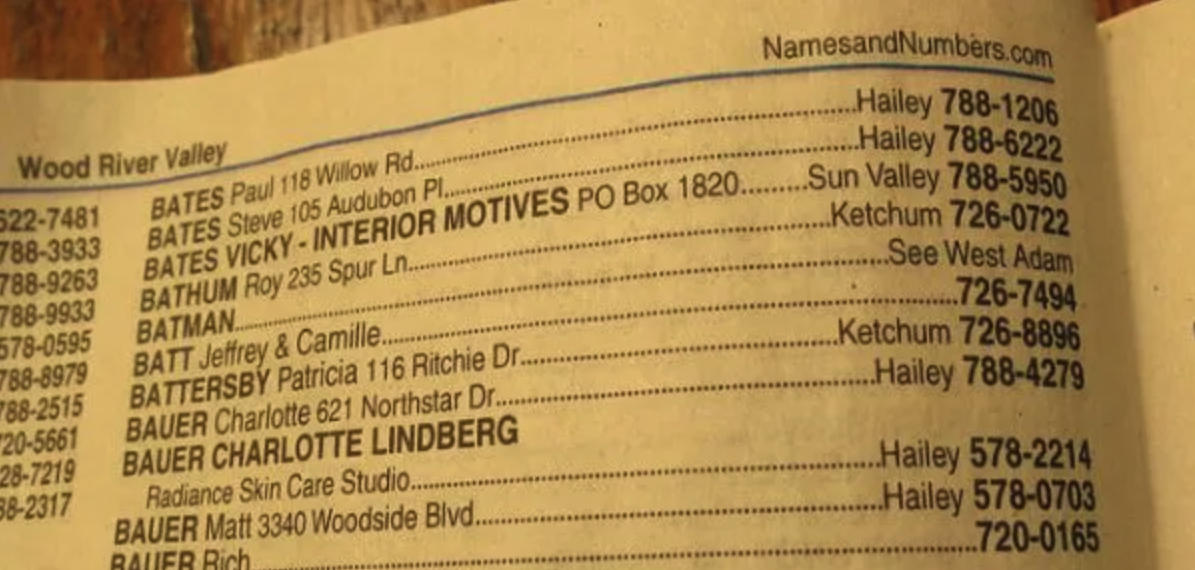

In [40]:
#screenshots
from IPython import display
print("Atlas UI Creation button")
display.Image("../../_imagesForCerts/phoneBook.png")

{last_name:1,first_name:1,address:1}

Thinking about questions that we can efficiently answer with this phonebook is a great metaphor for use of compound indexes

Questions this book could easily answer:
- What is Paul Bates's address and telephone number? `db.people.find({lastName:"Bates",firstName:"Paul"})`
- How many Bates are there? `db.people.countDocuments({lastName:"Bates"})`
- Organize (sort) all the Bates by first name. `db.people.find({lastName:"Bates"}).sort({firstName:1})`

Questions that would be challenging:
- what is the number of the person who lives on 119 Willow Road? `db.people.find({addr:"119 Willow Rd"})`
- How many Charlottes are there? `db.people.countDocuments({firstName:"Charlotte"})`
- Sort this phonebook by first name, not last name `db.people.find().sort({firstName:1})`

This metaphor illustrates a concept called the **Index Prefix**

Basically, for compound indexes, you can cover sorts and searches that take advantages of all fields moving from left to right.

Given the index `{a:1,b:1,c:1}`, we could cover:
- `db.collection.find({a:"example"})`
- `db.collection.find({a:"example"}).sort({b:1})`
- `db.collection.find({a:"example"}).sort({b:1,c:1})` <-- compound sort
- `db.collection.find({a:"example",b:"example"})`
- `db.collection.find({a:"example",b:"example"}).sort({b:1})`
- `db.collection.find({a:"example",b:"example"}).sort({c:1})`
- `db.collection.find({a:"example",b:"example"}).sort({b:1,c:1})`
- `db.collection.find({a:"example",b:"example",c:"example"})`

Note that we assume equality matches for the above examples. Range queries don't follow the same rules.

ESR rule of thumb: It is generally a better index strategy to index fields in the order of equality, sort, range.

compound sorts must follow the same relative directions as the index. For example with the same `abc` index, we could cover sorts on `{a:1,b:1,c:1}` or `{a:-1,b:-1,c:-1}` but **not** `{a:1,b:-1,c:1}` for instance.

An implication of index prefixes is that indexes can be redundant. For example, given a collection with an index on `{a:1,b:1,c:1}`, the index `{a:1,b:1}` provides no value.

### Search Indexes + Aggregations

Everything that we have discussed so far has been a feature of the core MongoDB server (mongod). However, There is one part of the Developer Exam that is only applicable to Atlas, the MongoDB DBaaS. That is Atlas Search Indexes. **These are seperate from the MongoDB indexes we have been discussing**. These indexes are hosted on a Lucene process outside of of the database.

The way to define indexes is the via the Atlas UI or API, and the index definition is completely different from the syntax as shown previously in this session.

**Index Definition**

In order to configure a search index, one must use the Atlas UI, or Atlas admin API, or the MongoDB drivers. 

Generally the index definition has the following form:
```
{ 
  "name": "<index-name>", 
  "analyzer": "<analyzer-for-index>", 
  "searchAnalyzer": "<analyzer-for-query>", 
  "mappings": { 
    "dynamic": <boolean>, 
    "fields": { <field-definition> } 
  }, 
  "analyzers": [ <custom-analyzer> ],
  "storedSource": <boolean> | {
    <stored-source-definition>
  },
  "synonyms": [
  ...
  ] 
}
```
Although some of these configurations are outside the scope of the session, giving a search index a name, analyzer and mappings might come up on the developer exam. How do we _use_ this index? I won't make you wait for the answer.

It's the aggregation framework. Specifically the `$search` stage. Let's take a look (using an index called "default"):

In [50]:
aggString = "db.movies.aggregate([{\$search:{index:'default',text:{query:'piza',path:'title',fuzzy:{maxEdits:2}}}}])"

print(aggString.replace("\\", ""))
print("")

!mongosh {mongoDB_connection_string} --quiet  --username {mongoDB_username} -p {mongoDB_password} \
--eval "use sample_mflix" \
--eval """{aggString}"""

db.movies.aggregate([{$search:{index:'default',text:{query:'piza',path:'title',fuzzy:{maxEdits:2}}}}])

]0;mongosh mongodb+srv://<credentials>@devcert.6ngvd.mongodb.net/ [
  {
    _id: ObjectId("573a13a3f29313caabd0ed27"),
    plot: "In 1993 Fiza's brother disappears during the riots in Mumbai. In 1999 Fiza is tired of waiting and goes looking for him.",
    genres: [ 'Drama', 'Romance' ],
    runtime: 170,
    cast: [ 'Jaya Bhaduri', 'Karisma Kapoor', 'Hrithik Roshan', 'Neha' ],
    poster: 'https://m.media-amazon.com/images/M/MV5BMDk4YjE4NmYtZTE0Mi00N2IwLTlhZmUtZDMzOWJjMzJiZmEzXkEyXkFqcGdeQXVyOTA0NTIzNzU@._V1_SY1000_SX677_AL_.jpg',
    title: 'Fiza',
    fullplot: `Six years after Fiza's (Karisma Kapoor) brother, Aman (played by Hrithik Roshan) disappears during the 1993 Mumbai riots, she goes to look for him. When she does find him, to her horror she sees that he has joined a terrorist group. She forces him to come home, and he finally re-unites with their mother (played by Jaya B

      dvd: ISODate("2013-07-23T00:00:00.000Z"),
      critic: { rating: 6.6, numReviews: 51, meter: 75 },
      boxOffice: '$21.9k',
      consensus: 'It lacks subtlety and depth of character, but Pieta gets by with committed performances and a darkly ambitious, deceptively simple message.',
      rotten: 13,
      production: 'Drafthouse Films',
      lastUpdated: ISODate("2015-09-12T19:22:58.000Z"),
      fresh: 38
    }
  },
  {
    _id: ObjectId("573a13def29313caabdb6f31"),
    countries: [ 'Latvia' ],
    genres: [ 'Drama' ],
    runtime: 63,
    cast: [ 'Pauls Iklavs', 'Reinis Stabins' ],
    num_mflix_comments: 1,
    title: 'Picas',
    lastupdated: '2015-05-16 01:36:47.463000000',
    languages: [ 'Latvian' ],
    released: ISODate("2012-11-11T00:00:00.000Z"),
    directors: [ 'Laila Pakalnina' ],
    writers: [ 'Laila Pakalnina' ],
    awards: { wins: 1, nominations: 1, text: '1 win & 1 nomination.' },
    year: 2012,
    imdb: { rating: 6.2, votes: 21, id: 2536316 },
    typ

Comment on Atlas UI:
- data explorer and loading sample dataset might be included in dev certification exam as well